<a href="https://colab.research.google.com/github/Raghuram-Veeramallu/NGC5053-Binarystar-Fraction/blob/project1/Project1_Group3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AST/STAT 5731 Project 1

**Group: 3**  
Hari Veeramallu  
Nicholas Kruegler  
Daniel Warshofsky  
Jonah Koleske  

## Research Question  

What is the fraction of binary stars in the Globular Cluster NGC 5053?

## Preamble

The dynamical evolution of a globular cluster (GC) can be impacted by the binary fraction, which is a measurement of the percent of the stars in a GC that are binary systems. Even a small binary fraction can have a large influence by cooling the cluster and pushing the system towards a higher mass concentration. This GC was chosen because a previous survey was carried out that found a sample of binary stars, and the detection rate bias parameter was determined for this galaxy, so we can adjust the recorded rate with the rate that would go undetected.

## Data

All the observations were made with the Norris Multifibre Spectrograph on the Hale 5.0 m telescope. A total of 6 epochs of a sample of 77 cluster member stars with a total timespan of 3 years was observed.

Source: https://vizier.cds.unistra.fr/viz-bin/VizieR-3?-source=J/AJ/112/1489/table2b


### How to detect binary stars from radial velocities
Stars in a globular cluser have three compents of their radial velocities: the velocity of the cluster around the galaxy, the velocity of the stars orbit around the cluster, and, if the system is a binary, the velocity due to the binary orbit. The motion of the cluster around the galaxy and the motion of the star around the cluster change very slowly over observation timescales, whereas the variation in the binary orbital velcity is comparable to observation times. This means that repeated radial velocity measurements of non-binary stars should only have scatter associated with the error in measurement, while binary star observations will have extra scatter associated with the binary motion.

This method is limited for a few reasons. First, it is unable to detect extremely long or short binary periods. Second, the method is only sensitive to the radial motion of the stars so systems that are face-on will not be detected, as there will be no binary orbital motion towards or away from the observer. Thus, there is some bias. The paper which published the data (https://arxiv.org/pdf/astro-ph/9607116.pdf) calculated a binary observation efficiency of 29%, i.e. only 29% of the total binary star systems in the cluster will be observed through this method.

The radial velocity method is only sensitive to the radial motion of the stars so systems that are face-on will not be detected, in the paper the authors preform a simulation to determinne how many systems they were likely to discover. After their anaylsis they determined that they would have discovered 29% of binaries.


### Decisions about the Data
The paper (https://arxiv.org/pdf/astro-ph/9607116.pdf) states that data from 77 stars NGC 5053 but only 66 had enough radial velocity measurements to determine if they are binary so analysis is restricted to only those stars. For one binary star (candadate ST) the authors were unsure of its membership to the cluster and counted it as being 0.5 of a binary, in our analysis we will count it as a full binary. Our analysis has $x=6$ where as the authors would have $x=5.5$.

## The Statistical Model

### Data Variables
1. $\theta$, the probability that the star system is binary.  
2. $\theta \in [0, 1]$  
3. $ x = 6, n = 66 $  
4. $ X \in \{0, 1\}^{n} $  
5. $ X | \theta  \in Binomial(n, \theta) $  
6. Given $ a > 0, b > 0 $, then $ \theta \sim Beta(a, b) $ (since beta is the conjugate prior of binomial).


### Likelihood Function
The sample space for observed data is a binary answer: either a star system is binary or it isn’t. Thus, we would expect it to follow a binomial distribution, which will be the model used in the statistical analysis.

For a binomial distribution, the expectation value is:
$E[X]=n\theta$

The variance is:
$Var[X]=n\theta (1-\theta)$

### Prior Distribution
A beta distribution is used for the prior, since the beta distribution is the conjugate prior for the binomial distribution. This makes the analytical calculation of the posterior possible, without relying on Monte Carlo computations. There is already previous knowledge about the binary fraction in the Milky Way, where this specific globular cluster NGC 5053 is found, so we have information for a prior. The binary fraction of the Milky Way Galaxy is roughly 0.5 with variation depending on the star type. Accounting for the detection bias, the detection ratio would be ~0.15. We will choose a prior with that as the mean through a prior predictive check.


For a beta distribution $Beta(a,b)$, the expectation value is:
$E[X] = \frac{a}{a+b}$

The variance is:
$Var[X] = \frac{ab}{(a+b)^2 (a+b+1)}$

### Posterior Distribution
Because the likelihood is a binomial distribution and we have assumed the prior to be a beta function, the posterior distribution can be found analytically.

Posterior is $\theta|x \sim Beta(a+x, n+b-x)$

The posterior expectation value will be:
$E[X] = \frac{a+x}{a+b+n}$

## Software and Installation

We recommend using a `conda` environment to install the requirements and run the notebook.  

1. Install Conda
Conda can be installed from this page: https://conda.io/projects/conda/en/latest/user-guide/install/index.html.  

2. Create a conda environment
```
conda create --name ast5731_group3_project1 --file requirements.txt
```
You can change the name of the environment from `ast5731_group3_project1` to the one you want.

3. Install Jupyter notebook from this page: https://jupyter.org/install  

4. The notebook can be run using by starting the jupyter notebook server

```
jupyter notebook
```

navigate to the file and run the `Project1_Group3.ipynb`

## Code and Computation Details

### Loading the data and Visualizing them

In [ ]:
## Importing the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from random import seed

# import required only for google colab runtime
from google.colab import drive

# for darkgrid visualizations
import arviz as az
az.style.use('arviz-darkgrid')

In [ ]:
## Reading the data

# for local runtime
df = pd.read_table('./content/BinaryStarsNGC5053.tsv')

# for google drive (https://drive.google.com/drive/folders/1hatW5Gb4E7PtSTrPNSCLFlFZZkixh5F9?usp=sharing)
# drive.mount('/content/drive')
# df = pd.read_table('drive/MyDrive/BayesianAstrostat/Project1/BinaryStarsNGC5053.tsv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## Looking at the data
df.sample(10)

,Star,Dist,VR,chi2,P(<chi2)
40,SS,235.2,291.5,2.552,0.2791
13,S54,76.3,291.1,39.236,0.0000
76,LY024,340.7,291.8,,NaN
25,LY043,182.4,288.2,2.945,0.2294
52,S91,144.2,296.1,13.630,0.0035
4,LY019,153.5,293.6,1.232,0.7454
10,LY022,49.0,290.2,1.282,0.8644
37,S106,418.2,296.9,1.742,0.1868
42,SP,125.1,289.1,3.068,0.5465
65,LY40,125.5,290.7,0.578,0.4469


**Data Description:**  
*Star* - Name of the star system.  
*Dist* - Radial distance of the star from the cluster  
*VR* - Weighted Mean Radial Velocity.  
*chi2* - Radial Velocity variability over the timespan of 3 years.  
*P(<chi2)* - Probability  

The P(*<chi2*) is calculated to estimate the probability of having the chi2 at least this large purely due to a chance of fluctuations. Reasonable limits of P(*<chi2*) to identify significant variations are 0.01 - 0.001

In [ ]:
# Looking at the statistics of the data
df.describe()

,Dist,VR,P(<chi2)
count,77.000000,77.000000,66.000000
mean,210.640260,291.355844,0.478300
std,117.873282,2.339562,0.288685
min,15.200000,286.600000,0.000000
25%,125.100000,290.000000,0.265450
50%,205.400000,291.000000,0.498950
75%,275.800000,292.500000,0.711400
max,513.900000,299.200000,0.942000


Within these stars the binary stars are defined as the ones having *P(<chi2)* $\lt 0.01$.  

In [ ]:
# Number of star systems with a single radial velocity observations
sin_obs = df[df['P(<chi2)'].isna()]
# Number of star systems with more than one radial velocity observations
mul_obs = df[~df['P(<chi2)'].isna()]
# Number of binary stars within the star systems with more than one radial velocity observations
bin_stars = mul_obs[mul_obs['P(<chi2)'] < 0.01]

In [ ]:
print(f'Total number of star systems present: {len(df)}')
print(f'Number of star systems having only a single Radial Velocity measurement: {len(sin_obs)}')
print(f'Number of star systems having multiple Radial Velocity measurements: {len(mul_obs)}')
print(f'Number of binary stars among the ones with multiple RV measurements: {len(bin_stars)}')

Total number of star systems present: 77
Number of star systems having only a single Radial Velocity measurement: 11
Number of star systems having multiple Radial Velocity measurements: 66
Number of binary stars among the ones with multiple RV measurements: 6


From the description we can see that only 66 out of the 77 can be used for binary search since the remaining 11 only have a single radial velocity measurement observed.

### Visualizing the data

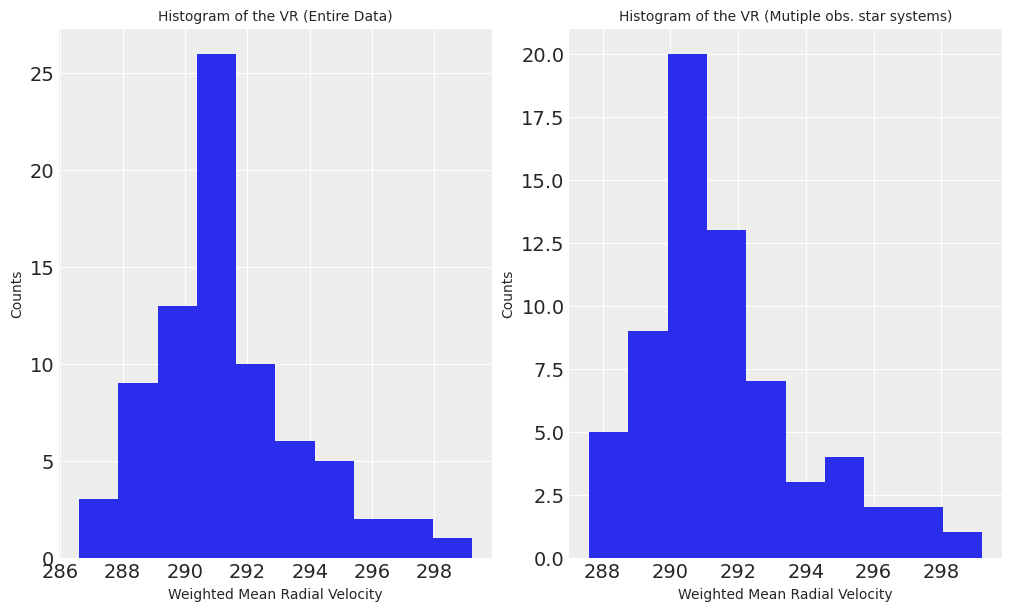

In [ ]:
# histogram of Weighted Mean Radial Velocities (VR)
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].hist(df['VR'])
ax[0].set_xlabel('Weighted Mean Radial Velocity', size = 10)
ax[0].set_ylabel('Counts', size = 10)
ax[0].set_title('Histogram of the VR (Entire Data)', size = 10)
ax[1].hist(mul_obs['VR'])
ax[1].set_xlabel('Weighted Mean Radial Velocity', size = 10)
ax[1].set_ylabel('Counts', size = 10)
ax[1].set_title('Histogram of the VR (Mutiple obs. star systems)', size = 10)

plt.show()

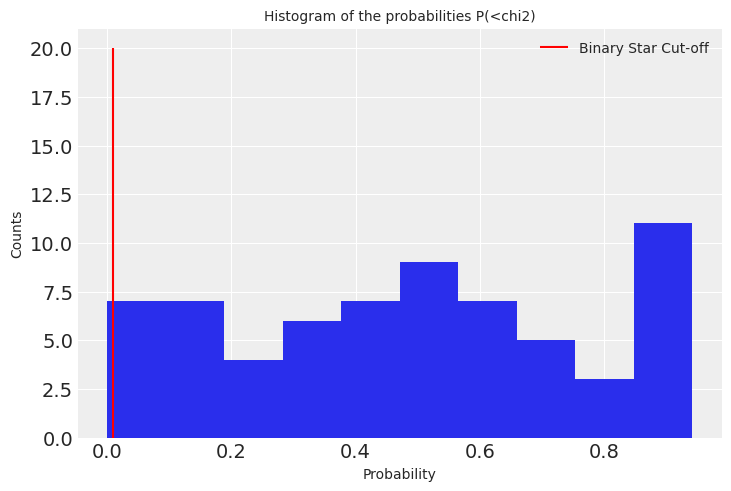

In [ ]:
plt.hist(mul_obs['P(<chi2)'])
plt.vlines(0.01, 0, 20, label = "Binary Star Cut-off", color='r')
plt.xlabel('Probability', size=10)
plt.ylabel('Counts', size=10)
plt.title('Histogram of the probabilities P(<chi2)', size=10)
plt.legend(prop={'size': 10})
plt.show()

In [ ]:
nobs = len(mul_obs)
nbin_obs = len(bin_stars)

$a' = a + x$  
$b' = n + b - x$

### Prior Predictive Check

In [ ]:
# Defining a function to perform prior predictive check
def prior_pred(a, b, samples):
  mean = []
  var = []
  np.random.seed(5731)
  fig,ax = plt.subplots(1,1,figsize=(6,4))
  for i in range(samples):
    theta = stats.beta.rvs(a,b,size=1)
    simdat = stats.binom.rvs(nobs,theta,size=66)
    mean.append(np.mean(simdat))
    var.append(np.var(simdat))

  ax.hist(mean)
  ax.set_xlabel('Binary Star Systems', size=10)
  ax.set_ylabel('Counts', size=10)
  ax.set_title(f"Number of Binary Systems out of 66 systems (N={samples} Samples)", size = 12)
  ax.axvline(6, c="r")
  ax.legend(["Actual Observed Number"], prop={'size': 10})

  fig.show()

  return np.median(mean), np.median(var)

(32.56060606060606, 11.88957759412305)

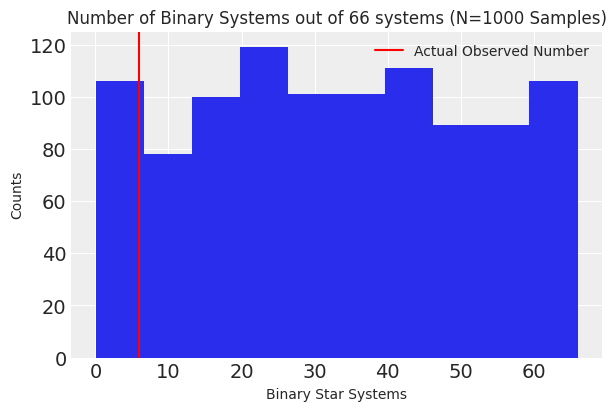

In [ ]:
prior_pred(1,1,1000)

(1.9545454545454546, 1.825642791551882)

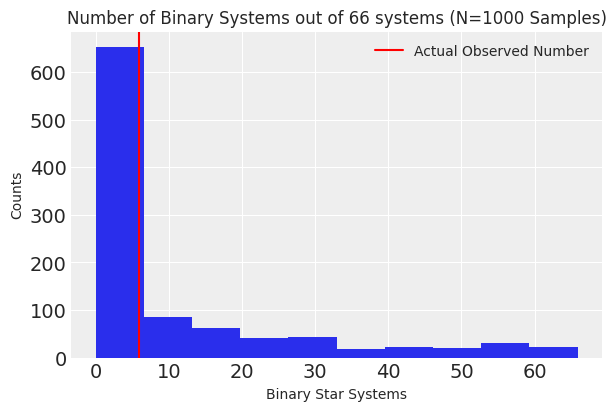

In [ ]:
prior_pred(0.2,1,1000)

(10.121212121212121, 8.216483011937559)

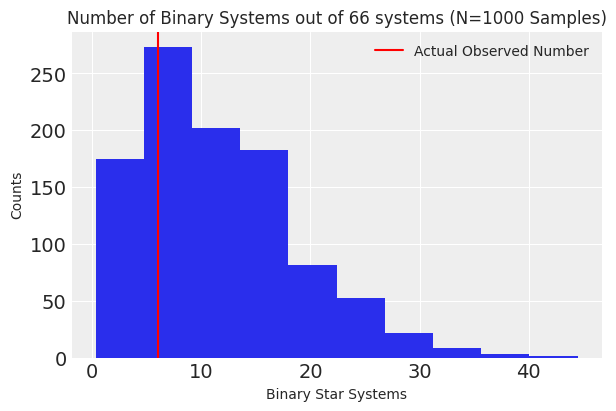

In [ ]:
prior_pred(2,10,1000)

(10.287878787878787, 8.415518824609734)

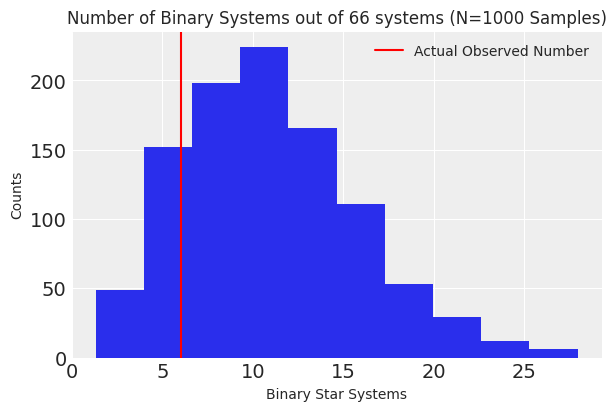

In [ ]:
prior_pred(4,20,1000)

In the prior predictive distribution for $a=2$ and $b=10$, the observed number of binary star systems ($x=6$) is in one of the bins with the largest counts, so would not be unexpected to get that observation from such a prior. As we will show later, the posterior is not very sensitive to priors with a mean around 0.15, but we will move forward with the $a=2$ and $b=10$.

### Calculation of the Posterior

In [ ]:
# function to plot the distributions
def plot_beta_curves(a, b):
  a_bar = a + nbin_obs
  b_bar = nobs + b - nbin_obs
  print(f'a\': {a_bar}, b\': {b_bar}')

  post_mean = a_bar / (a_bar + b_bar)
  post_var = (a_bar * b_bar)/((a_bar + b_bar) ** 2 * (a_bar + b_bar + 1))
  print(f'Actual Mean: {round(post_mean, 4)} and Posterior Variance: {round(post_var, 4)}')
  print(f'Posterior Mean: {round(post_mean, 4)} and Posterior Variance: {round(post_var, 4)}')

  post_lb = stats.beta.ppf(0.01, a_bar, b_bar)
  post_ub = stats.beta.ppf(0.99, a_bar, b_bar)
  print(f'Lower bound: {round(post_lb, 4)} and Upper bound: {round(post_ub, 4)}')

  x1 = np.linspace(stats.beta.ppf(0.01, 1, 1), stats.beta.ppf(0.99, 1, 1), 100)
  y1 = stats.beta.pdf(x1, a, b)
  plt.plot(x1, y1, color='r', ls='--', label='prior')

  x2 = np.linspace(stats.beta.ppf(0.01, a_bar, b_bar), stats.beta.ppf(0.99, a_bar, b_bar), 100)
  y2 = stats.beta.pdf(x2, a_bar, b_bar)
  plt.plot(x2,y2, label='posterior')
  # plt.axvline(post_mean, color='b', ls='--', label='posterior mean')

  plt.axvline(6/66,c="r")
  plt.title("a={}, b={}".format(a,b))
  plt.legend()
  plt.show()

a': 8, b': 70
Actual Mean: 0.1026 and Posterior Variance: 0.0012
Posterior Mean: 0.1026 and Posterior Variance: 0.0012
Lower bound: 0.0388 and Upper bound: 0.1959


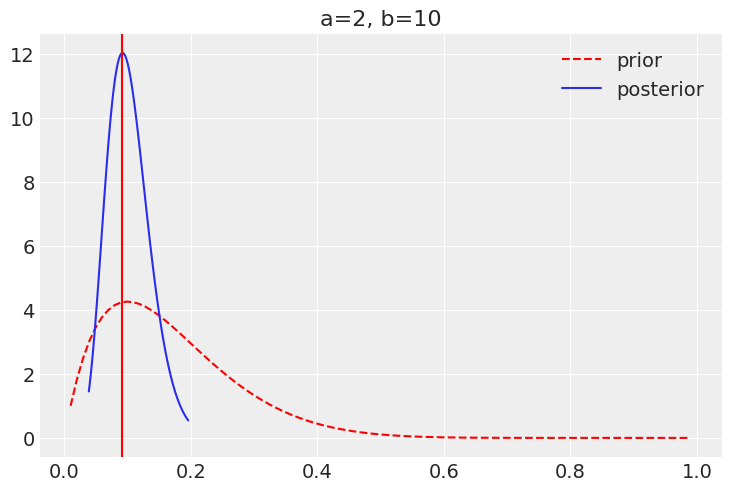

In [ ]:
plot_beta_curves(2, 10)

### Sensitivity Analysis

We are selecting different values of a, b and see how much they influence the posterior.

a': 7, b': 61
Actual Mean: 0.1029 and Posterior Variance: 0.0013
Posterior Mean: 0.1029 and Posterior Variance: 0.0013
Lower bound: 0.0358 and Upper bound: 0.2039


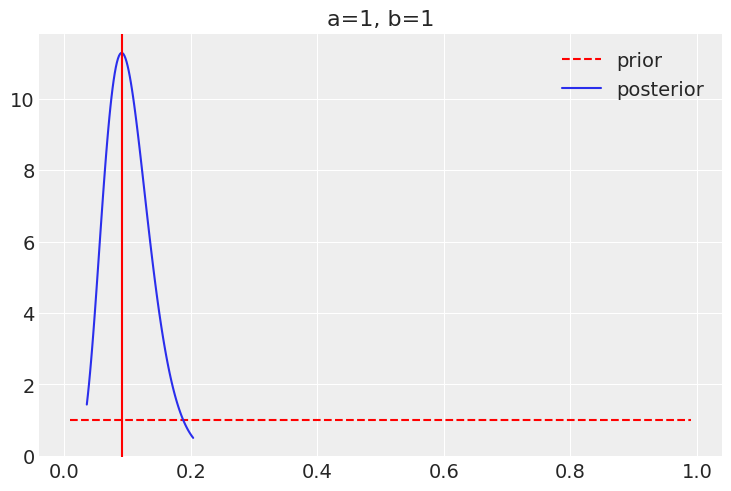

In [ ]:
plot_beta_curves(1, 1)

a': 6.2, b': 61
Actual Mean: 0.0923 and Posterior Variance: 0.0012
Posterior Mean: 0.0923 and Posterior Variance: 0.0012
Lower bound: 0.0293 and Upper bound: 0.1902


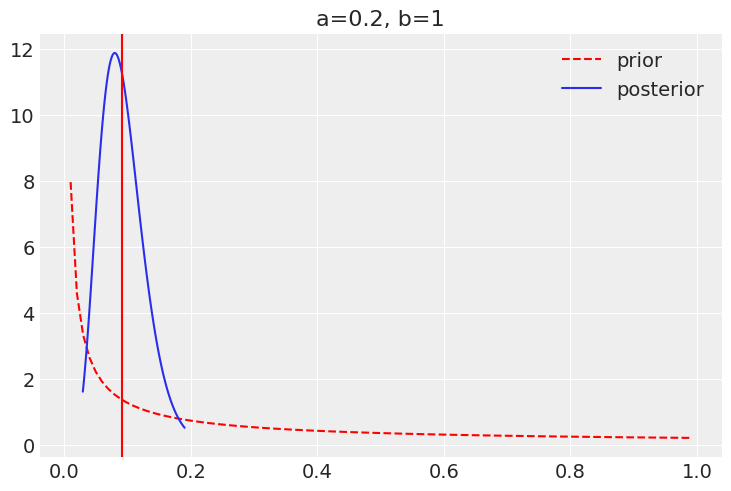

In [ ]:
plot_beta_curves(0.2, 1)

a': 10, b': 80
Actual Mean: 0.1111 and Posterior Variance: 0.0011
Posterior Mean: 0.1111 and Posterior Variance: 0.0011
Lower bound: 0.0477 and Upper bound: 0.1996


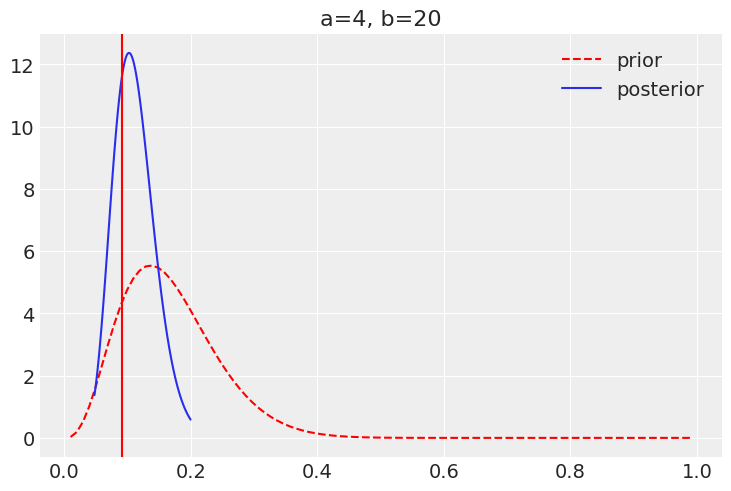

In [ ]:
plot_beta_curves(4, 20)

a': 8, b': 62
Actual Mean: 0.1143 and Posterior Variance: 0.0014
Posterior Mean: 0.1143 and Posterior Variance: 0.0014
Lower bound: 0.0434 and Upper bound: 0.2171


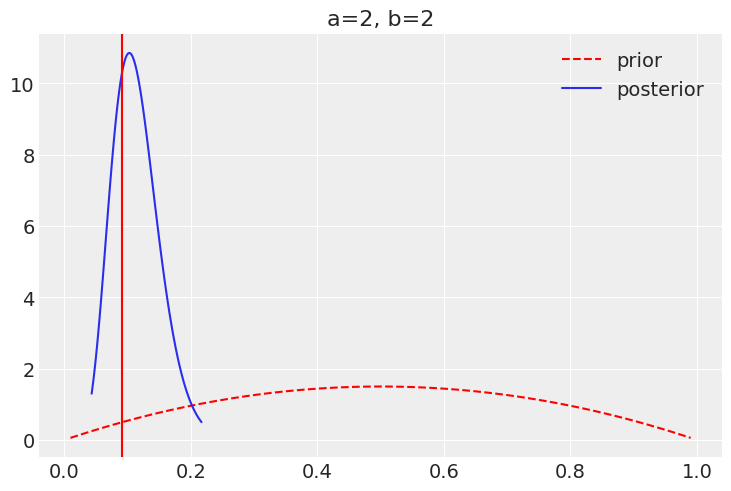

In [ ]:
plot_beta_curves(2, 2)

a': 16, b': 260
Actual Mean: 0.058 and Posterior Variance: 0.0002
Posterior Mean: 0.058 and Posterior Variance: 0.0002
Lower bound: 0.0301 and Upper bound: 0.0952


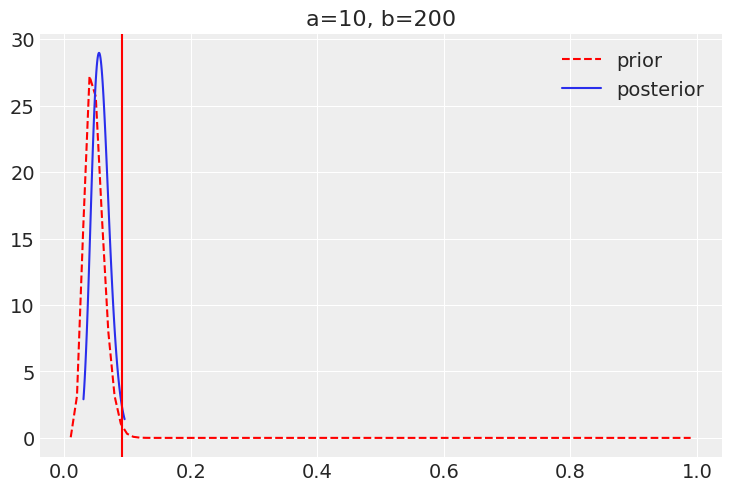

In [ ]:
plot_beta_curves(10, 200)

The prior predictive check shows that, for weakly or moderately informative priors, the mean of the observed fraction remains between 0.9 and 0.11. For the strongly informative prior ($a=10$, $b=200$), the mean observed fraction drops to 0.058, but this is not concerning because a strong prior with a mean away from the observed data is expected to change the results fairly significantly.

### Posterior Predictive Check

In [ ]:
# Defining a function to perform posterior predictive check
def post_pred(a, b, samples):
  a_bar = a + nbin_obs
  b_bar = nobs + b - nbin_obs

  mean = []
  var = []
  np.random.seed(5731)
  fig,ax = plt.subplots(1,1,figsize=(6,4))
  for i in range(samples):
    theta = stats.beta.rvs(a_bar,b_bar,size=1)
    simdat = stats.binom.rvs(nobs,theta,size=66)
    mean.append(np.mean(simdat))
    var.append(np.var(simdat))

  ax.hist(mean)
  ax.set_xlabel('Binary Star Systems', size=10)
  ax.set_ylabel('Counts', size=10)
  ax.set_title(f"Number of Binary Systems out of 66 systems (N={samples} Samples)", size = 12)
  ax.axvline(6, c="r")
  ax.legend(["Actual Observed Number"], prop={'size': 10})

  fig.show()

  return np.median(mean), np.median(var)

(6.545454545454546, 5.646579430670339)

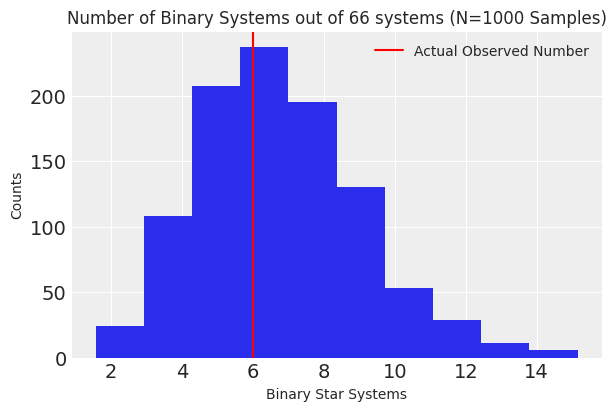

In [ ]:
post_pred(2,10,1000)

## Conclusion

After the Bayesian analysis, we find that the observation fraction has a mean of 0.103. Accounting for the discovery efficiency of 29%, the binary fraction of NGC 5053 is \~35%. This is lower than the binary fraction for the Milky Way Galaxy (\~50%). The lower prediction aligns with the results of the paper from which we obtained the data (\~25% obtained by other means).
